# Labeling

In [ ]:
from PIL import Image, ImageDraw
from pathlib import Path
import json

## LabelMe

[LabelMe](https://github.com/wkentaro/labelme) is simple-to-use GUI for labeling. It is straightforward to use (`pip install labelme`, run in terminal as `labelme`):

![labelme](images/labelme_example.png)

The segmentation points will be saved as json files:

```
{
  "version": "5.1.1",  
  "flags": {},  
  "shapes": [
    {
      "label": "1",
      "points": [
        [
          4.029411764705877,
          1.0882352941176439
        ],
        [
          0.7941176470588189,
          53.73529411764706
        ],
        [
          0.7941176470588189,
          221.97058823529412
        ],
        [
          12.852941176470587,
          1.3823529411764672
        ]
      ],
      "group_id": null,
      "shape_type": "polygon",
      "flags": {}
    },
    ...
 ```

Let's load some image and generated json file:

256 256


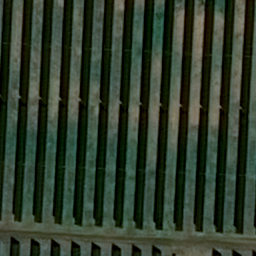

In [ ]:
im = Image.open("images/solar_panels.png")
width, height = im.size
print(width, height)
im

Let's convert the json into a mask:

In [ ]:
with open('images/solar_panels.json') as f:
    data = json.load(f)

There are:

In [ ]:
points = data['shapes']
len(points)

20

20 data points, let's make a mask out of those:

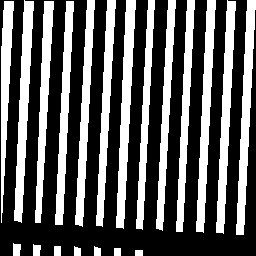

In [ ]:
mask = Image.new('L', (width, height), 0)
for group in points:
    label_class = group['label']
    polygon = group['points']
    polygon = [(round(x), round(y)) for x,y in polygon]
    ImageDraw.Draw(mask).polygon(polygon, outline=255, fill=255)
mask

and save this as a file:

In [ ]:
mask.save('images/solar_panels_mask.png')

In [ ]:
assert Path('images/solar_panels_mask.png').is_file()